In [3]:
from ipynb.fs.full.functions import import_data
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers, regularizers
import numpy as np
import keras.utils
import matplotlib.pyplot as plt
import pandas as pd


### Import data

In [13]:
#import training set
X_train, y_train = import_data('databases/Database_2_training.csv')
X_test, y_test = import_data('databases/Database_2_test.csv')
input_size = X_train.shape[1]


### Build model 



In [5]:
model = Sequential()

model.add(Dense(512, activation='relu', input_dim=input_size,kernel_regularizer=regularizers.l2(0.00)))
model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile model

In [6]:
optimizer = optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train model

In [7]:
#X_train is 0.8 of total data set so cross validation needs to be 0.25 of X_train to be 0.2 of total dataset
history = model.fit(X_train, y_train, validation_split=0.25, epochs=200, batch_size=16, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 2267 samples, validate on 756 samples
Epoch 1/200
2267/2267 [==============================] - 2s 1ms/step - loss: 0.8736 - acc: 0.6396 - val_loss: 0.6373 - val_acc: 0.7765
Epoch 2/200
2267/2267 [==============================] - 1s 223us/step - loss: 0.7967 - acc: 0.6753 - val_loss: 0.5456 - val_acc: 0.7474
Epoch 3/200
2267/2267 [==============================] - 0s 192us/step - loss: 0.7027 - acc: 0.7203 - val_loss: 0.5210 - val_acc: 0.7831
Epoch 4/200
2267/2267 [==============================] - 0s 175us/step - loss: 0.6801 - acc: 0.7296 - val_loss: 0.4906 - val_acc: 0.8161
Epoch 5/200
2267/2267 [==============================] - 0s 185us/step - loss: 0.6726 - acc: 0.7521 - val_loss: 0.4988 - val_acc: 0.7870
Epoch 6/200
2267/2267 [==============================] - 0s 176us/step - loss: 0.5651 - acc: 0.7742 - val_loss: 0.6983 - val_acc: 0.7037
Epoch 7/200
2267/2267 [==============================] - 0s 204us/step - loss: 0.6178

2267/2267 [==============================] - 0s 193us/step - loss: 0.1886 - acc: 0.9515 - val_loss: 0.1902 - val_acc: 0.9048
Epoch 59/200
2267/2267 [==============================] - 0s 197us/step - loss: 0.2183 - acc: 0.9413 - val_loss: 0.1261 - val_acc: 0.9616
Epoch 60/200
2267/2267 [==============================] - 0s 183us/step - loss: 0.1957 - acc: 0.9541 - val_loss: 0.1080 - val_acc: 0.9669
Epoch 61/200
2267/2267 [==============================] - 0s 182us/step - loss: 0.2128 - acc: 0.9475 - val_loss: 0.1286 - val_acc: 0.9511
Epoch 62/200
2267/2267 [==============================] - 0s 170us/step - loss: 0.2260 - acc: 0.9475 - val_loss: 0.0996 - val_acc: 0.9683
Epoch 63/200
2267/2267 [==============================] - 0s 172us/step - loss: 0.1811 - acc: 0.9577 - val_loss: 0.1768 - val_acc: 0.9246
Epoch 64/200
2267/2267 [==============================] - 0s 170us/step - loss: 0.1812 - acc: 0.9510 - val_loss: 0.1533 - val_acc: 0.9484
Epoch 65/200
2267/2267 [=======================

2267/2267 [==============================] - 0s 171us/step - loss: 0.1637 - acc: 0.9541 - val_loss: 0.1056 - val_acc: 0.9669
Epoch 118/200
2267/2267 [==============================] - 0s 170us/step - loss: 0.1548 - acc: 0.9621 - val_loss: 0.0745 - val_acc: 0.9696
Epoch 119/200
2267/2267 [==============================] - 0s 169us/step - loss: 0.1350 - acc: 0.9625 - val_loss: 0.0976 - val_acc: 0.9550
Epoch 120/200
2267/2267 [==============================] - 0s 173us/step - loss: 0.1427 - acc: 0.9687 - val_loss: 0.0686 - val_acc: 0.9788
Epoch 121/200
2267/2267 [==============================] - 0s 175us/step - loss: 0.1428 - acc: 0.9625 - val_loss: 0.0900 - val_acc: 0.9722
Epoch 122/200
2267/2267 [==============================] - 0s 182us/step - loss: 0.1448 - acc: 0.9625 - val_loss: 0.1383 - val_acc: 0.9339
Epoch 123/200
2267/2267 [==============================] - 0s 196us/step - loss: 0.1573 - acc: 0.9568 - val_loss: 0.0686 - val_acc: 0.9762
Epoch 124/200
2267/2267 [================

2267/2267 [==============================] - 1s 229us/step - loss: 0.1635 - acc: 0.9713 - val_loss: 0.0813 - val_acc: 0.9696
Epoch 177/200
2267/2267 [==============================] - 0s 213us/step - loss: 0.1187 - acc: 0.9722 - val_loss: 0.1088 - val_acc: 0.9616
Epoch 178/200
2267/2267 [==============================] - 0s 216us/step - loss: 0.1646 - acc: 0.9603 - val_loss: 0.0670 - val_acc: 0.9735
Epoch 179/200
2267/2267 [==============================] - 0s 217us/step - loss: 0.1396 - acc: 0.9638 - val_loss: 0.0736 - val_acc: 0.9802
Epoch 180/200
2267/2267 [==============================] - 0s 219us/step - loss: 0.1201 - acc: 0.9652 - val_loss: 0.0749 - val_acc: 0.9735
Epoch 181/200
2267/2267 [==============================] - 0s 219us/step - loss: 0.1322 - acc: 0.9621 - val_loss: 0.0641 - val_acc: 0.9669
Epoch 182/200
2267/2267 [==============================] - 0s 214us/step - loss: 0.1108 - acc: 0.9753 - val_loss: 0.0676 - val_acc: 0.9749
Epoch 183/200
2267/2267 [================

### Plot results

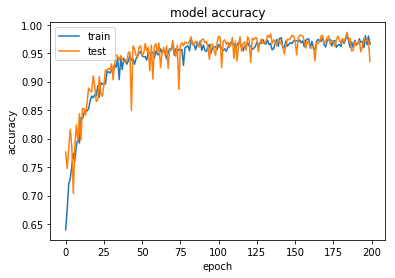

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on test set

In [9]:
loss, accuracy = model.evaluate(x=X_test, y=y_test,batch_size=64, verbose=1)
print('loss on test set = ' + str(loss))
print('accuracy on test set = ' + str(accuracy))

732/732 [==============================] - 0s 25us/step
loss on test set = 0.21653280533402344
accuracy on test set = 0.9494535515868598


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [11]:
results = model.predict(X_test, batch_size=64, verbose=0, steps=None)

In [12]:


results = pd.DataFrame(results, columns=['results']).to_csv('databases/Database_2_results.csv')